In [1]:
pip install imbalanced-learn

In [12]:
import tensorflow as tf
from tensorflow import keras
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [13]:
df=pd.read_csv("/content/Fertilizer Prediction.csv")

In [14]:
df.head()


,Temparature,Humidity,Moisture,Soil Type,Crop Type,Nitrogen,Potassium,Phosphorous,Fertilizer Name
0,26,52,38,Sandy,Maize,37,0,0,Urea
1,29,52,45,Loamy,Sugarcane,12,0,36,DAP
2,34,65,62,Black,Cotton,7,9,30,14-35-14
3,32,62,34,Red,Tobacco,22,0,20,28-28
4,28,54,46,Clayey,Paddy,35,0,0,Urea


In [15]:
df.describe()

,Temparature,Humidity,Moisture,Nitrogen,Potassium,Phosphorous
count,99.000000,99.000000,99.000000,99.000000,99.000000,99.000000
mean,30.282828,59.151515,43.181818,18.909091,3.383838,18.606061
std,3.502304,5.840331,11.271568,11.599693,5.814667,13.476978
min,25.000000,50.000000,25.000000,4.000000,0.000000,0.000000
25%,28.000000,54.000000,34.000000,10.000000,0.000000,9.000000
50%,30.000000,60.000000,41.000000,13.000000,0.000000,19.000000
75%,33.000000,64.000000,50.500000,24.000000,7.500000,30.000000
max,38.000000,72.000000,65.000000,42.000000,19.000000,42.000000


In [16]:
df.shape

(99, 9)

In [17]:
df["Soil Type"].unique()

array(['Sandy', 'Loamy', 'Black', 'Red', 'Clayey'], dtype=object)

<Axes: xlabel='Soil Type', ylabel='count'>

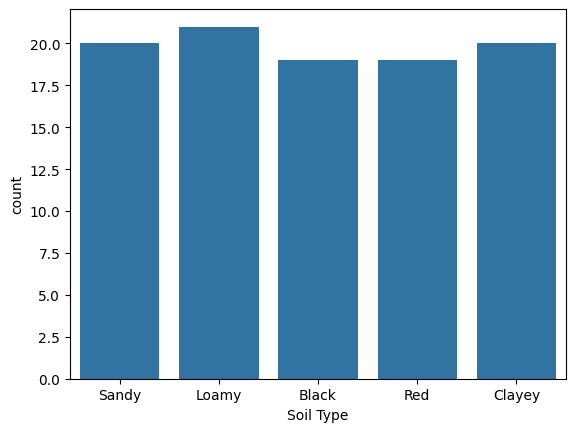

In [18]:
import seaborn as sns
sns.countplot(x='Soil Type',data=df)

<Axes: xlabel='Crop Type', ylabel='count'>

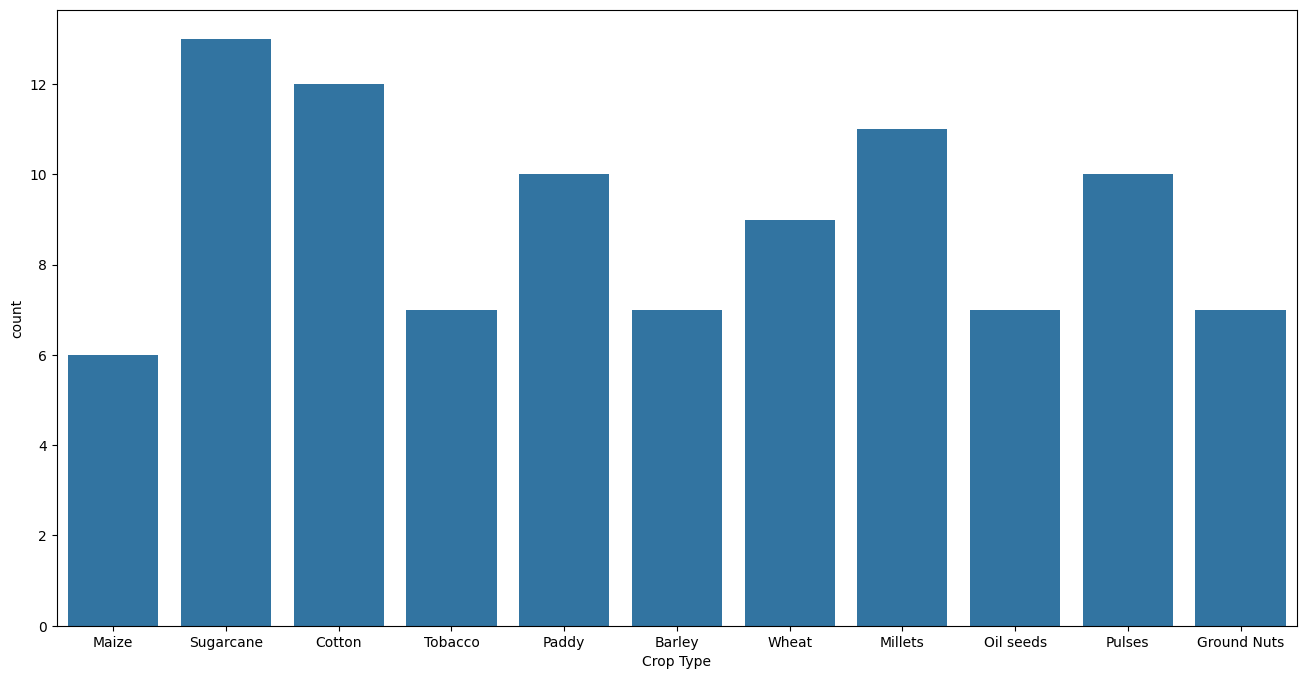

In [19]:
plt.figure(figsize=(16,8))
sns.countplot(x='Crop Type',data=df)

<Axes: xlabel='Fertilizer Name', ylabel='count'>

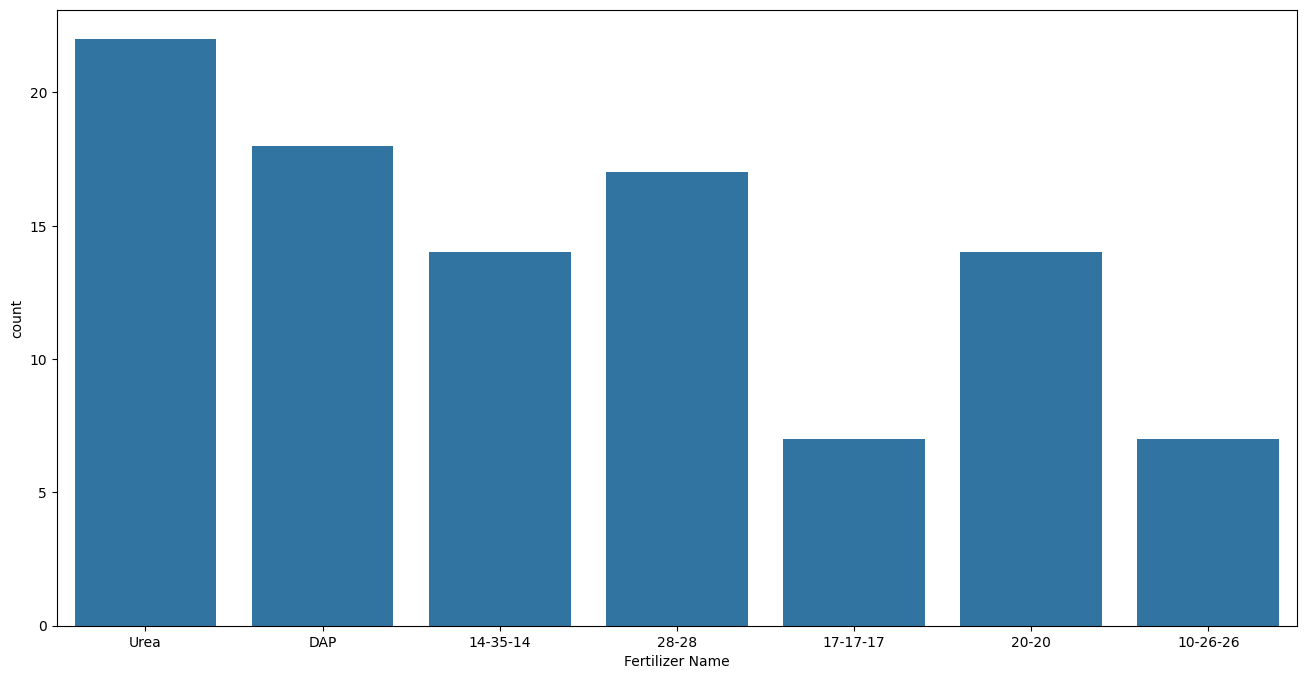

In [20]:
plt.figure(figsize=(16,8))
sns.countplot(x='Fertilizer Name',data=df)

In [21]:
def plot_confi(x):
    fig, axes = plt.subplots(nrows=1,ncols=3,figsize=(15,5),tight_layout=True)
    axes[0].set_title('Histogram')
    sns.histplot(x,ax=axes[0])
    axes[1].set_title('Checking Outliers')
    sns.boxplot(x,ax=axes[1])
    axes[2].set_title('Relation with output variable')
    sns.boxplot(y = x,x = df['Fertilizer Name'])

def plot_cato(x):
    fig, axes = plt.subplots(nrows=1,ncols=2,figsize=(15,5),tight_layout=True)
    axes[0].set_title('Count Plot')
    sns.countplot(x,ax=axes[0])
    axes[1].set_title('Relation with output variable')
    sns.countplot(x = x,hue = df['Fertilizer Name'], ax=axes[1])

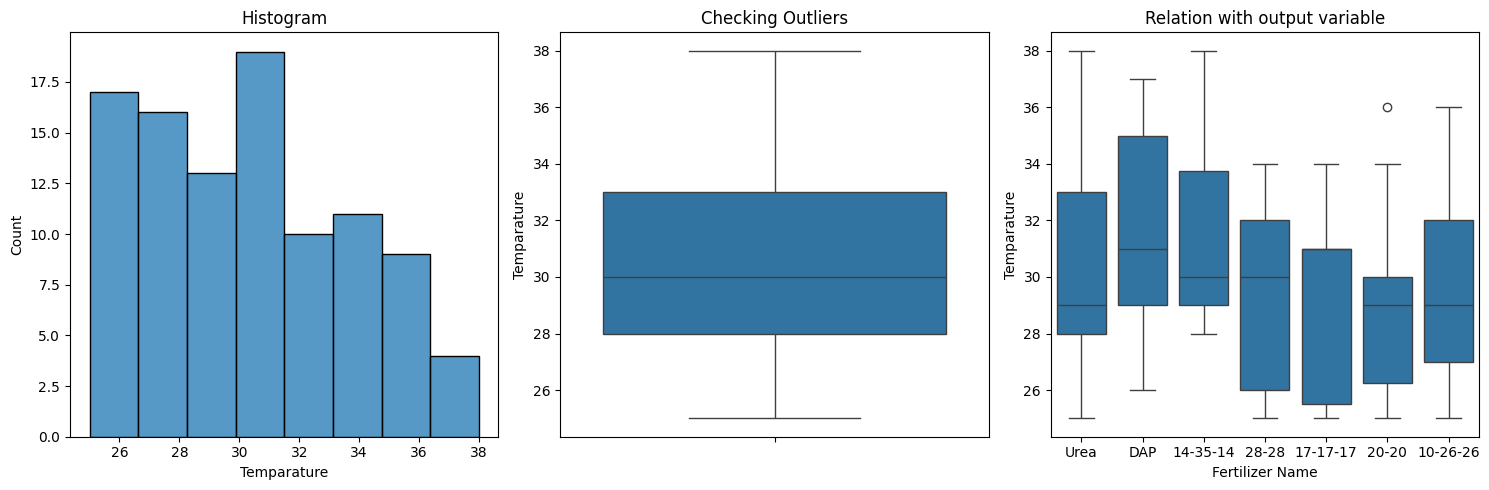

In [22]:
plot_confi(df['Temparature'])

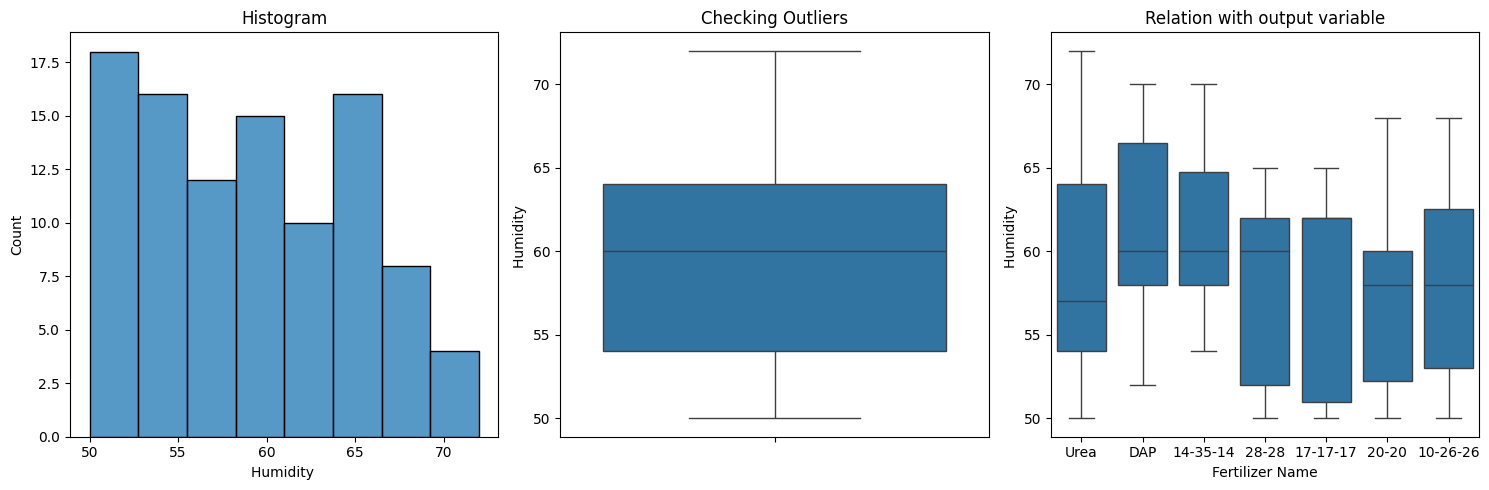

In [23]:
plot_confi(df['Humidity '])

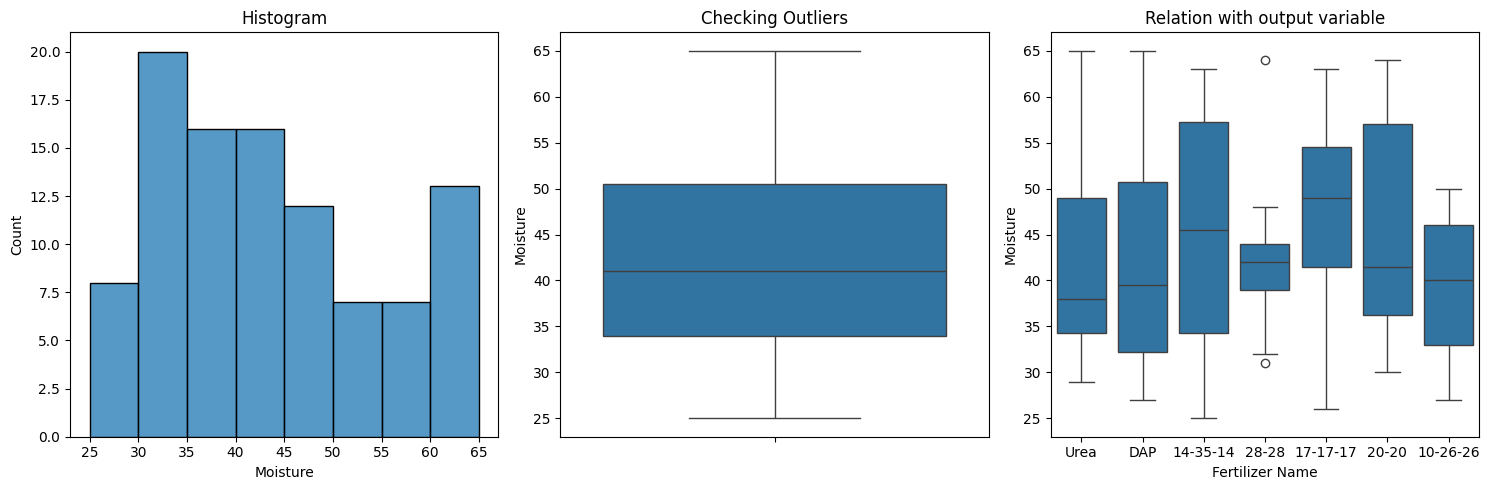

In [24]:
plot_confi(df['Moisture'])

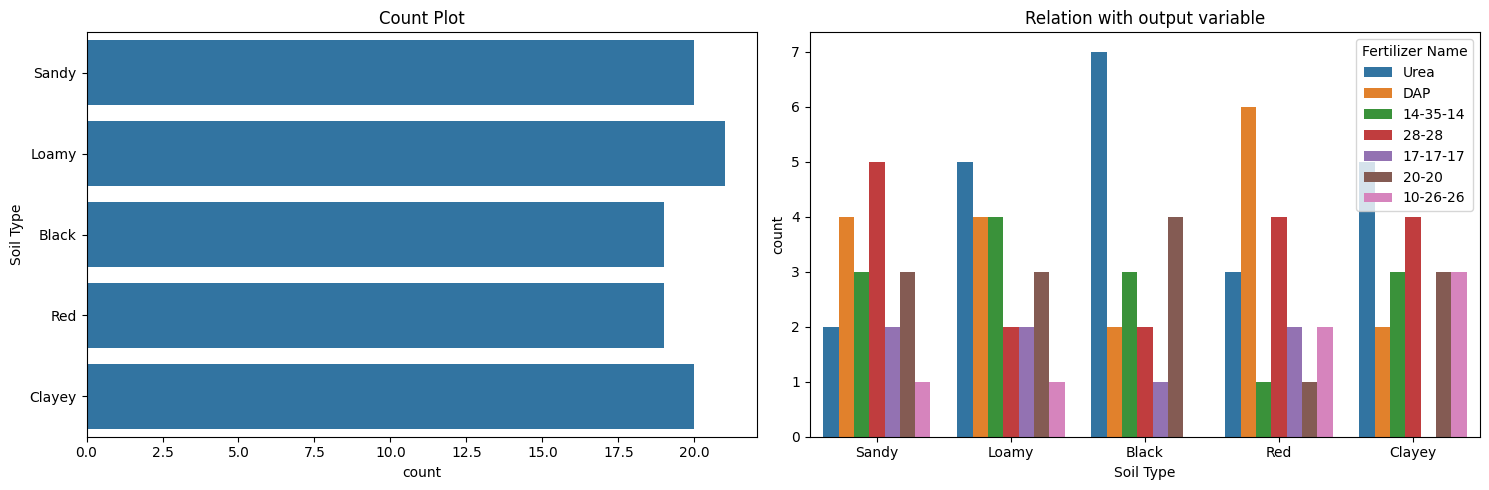

In [25]:
plot_cato(df['Soil Type'])

<Axes: xlabel='Soil Type', ylabel='Temparature'>

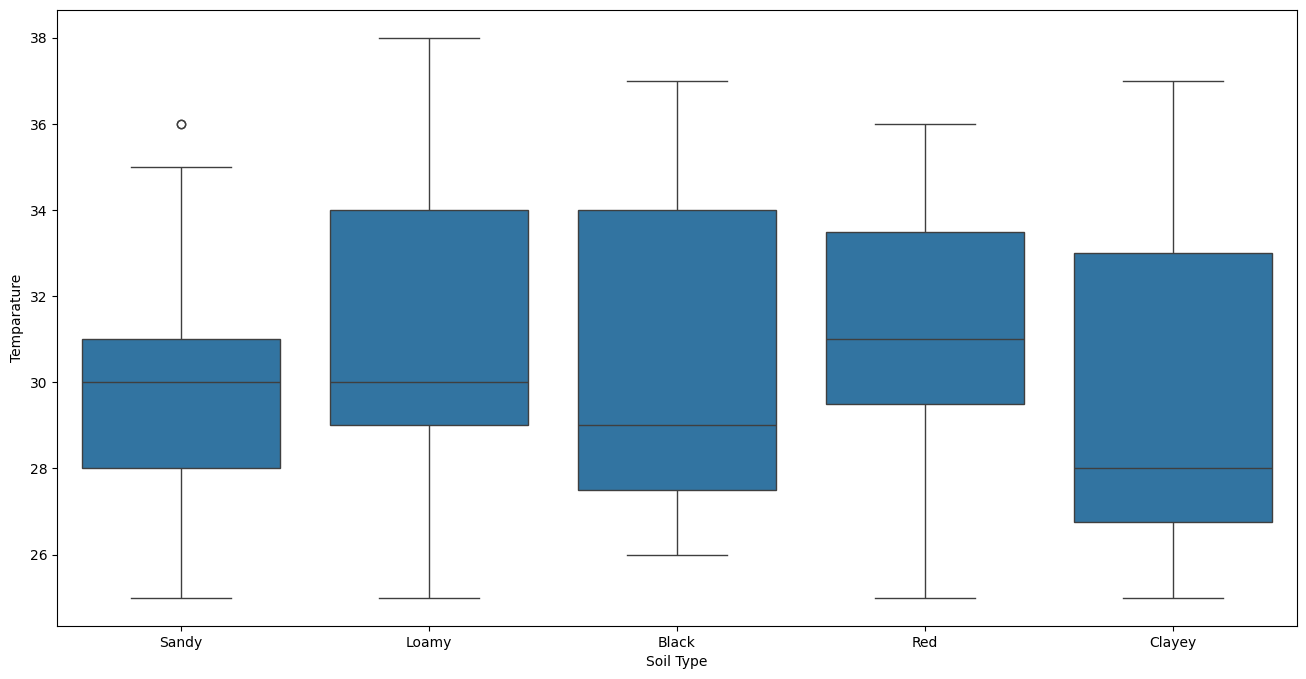

In [26]:
plt.figure(figsize=(16,8))
sns.boxplot(x=df['Soil Type'],y=df['Temparature'])

In [27]:
from sklearn.preprocessing import LabelEncoder
#encoding Soil Type variable
encode_soil = LabelEncoder()
df['Soil Type'] = encode_soil.fit_transform(df['Soil Type'])

Soil_Type = pd.DataFrame(zip(encode_soil.classes_,encode_soil.transform(encode_soil.classes_)),columns=['Original','Encoded'])
Soil_Type = Soil_Type.set_index('Original')
Soil_Type


,Encoded
Original,
Black,0
Clayey,1
Loamy,2
Red,3
Sandy,4


In [28]:
encode_crop =  LabelEncoder()
df['Crop Type'] = encode_crop.fit_transform(df['Crop Type'])

#creating the DataFrame
Crop_Type = pd.DataFrame(zip(encode_crop.classes_,encode_crop.transform(encode_crop.classes_)),columns=['Original','Encoded'])
Crop_Type = Crop_Type.set_index('Original')
Crop_Type


,Encoded
Original,
Barley,0
Cotton,1
Ground Nuts,2
Maize,3
Millets,4
Oil seeds,5
Paddy,6
Pulses,7
Sugarcane,8


In [29]:
encode_ferti = LabelEncoder()
df['Fertilizer Name'] = encode_ferti.fit_transform(df['Fertilizer Name'])

#creating the DataFrame
Fertilizer = pd.DataFrame(zip(encode_ferti.classes_,encode_ferti.transform(encode_ferti.classes_)),columns=['Original','Encoded'])
Fertilizer = Fertilizer.set_index('Original')
Fertilizer


,Encoded
Original,
10-26-26,0
14-35-14,1
17-17-17,2
20-20,3
28-28,4
DAP,5
Urea,6


In [30]:
y=df['Fertilizer Name'].copy()
X=df.drop('Fertilizer Name',axis=1).copy()


In [31]:
from sklearn.preprocessing import MinMaxScaler
Scaler=MinMaxScaler()
X=Scaler.fit_transform(X)

In [32]:
from imblearn.over_sampling import SMOTE
sm=SMOTE(random_state=2)
X,y=sm.fit_resample(X,y.ravel())

In [33]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test=train_test_split(X,y,train_size=0.8,shuffle=False,random_state=42)

In [34]:
from sklearn.model_selection import KFold
k_folds=5
kf = KFold(n_splits=k_folds, shuffle=False)


In [35]:

for train_index, test_index in kf.split(X):
  X_train_fold, X_test_fold = X[train_index], X[test_index]
  y_train_fold, y_test_fold = y[train_index], y[test_index]


In [36]:
X

array([[0.07692308, 0.09090909, 0.325     , ..., 0.86842105, 0.        ,
        0.        ],
       [0.30769231, 0.09090909, 0.5       , ..., 0.21052632, 0.        ,
        0.85714286],
       [0.69230769, 0.68181818, 0.925     , ..., 0.07894737, 0.47368421,
        0.71428571],
       ...,
       [0.30769231, 0.23143206, 0.59016891, ..., 0.22408555, 0.        ,
        0.85714286],
       [0.71696434, 0.71095786, 0.78171837, ..., 0.22941722, 0.        ,
        0.88186644],
       [0.78110974, 0.76202666, 0.23860667, ..., 0.20046597, 0.        ,
        0.89565968]])

In [37]:
X_train = np.asarray(X_train).astype(np.float32)
y_train = np.asarray(y_train).astype(np.float32)


In [38]:
X_train.shape

(123, 8)

In [39]:
X_train[0].shape

(8,)

In [40]:
tf.random.set_seed(42)

model1=tf.keras.Sequential([
    tf.keras.layers.Dense(3,activation='relu'),
    tf.keras.layers.Dense(10,activation='relu'),
    tf.keras.layers.Dense(7,activation='softmax')
])

In [41]:
model1.compile(loss="sparse_categorical_crossentropy",optimizer=tf.keras.optimizers.Adam(0.01),metrics=['accuracy'])


find_lr_history=model1.fit(X_train,y_train,epochs=30,validation_data=(X_test,y_test))

Epoch 1/30
4/4 [==============================] - 2s 115ms/step - loss: 1.9620 - accuracy: 0.2439 - val_loss: 1.9708 - val_accuracy: 0.0323
Epoch 2/30
4/4 [==============================] - 0s 24ms/step - loss: 1.9354 - accuracy: 0.2846 - val_loss: 1.9870 - val_accuracy: 0.0323
Epoch 3/30
4/4 [==============================] - 0s 24ms/step - loss: 1.9067 - accuracy: 0.3252 - val_loss: 1.9867 - val_accuracy: 0.0645
Epoch 4/30
4/4 [==============================] - 0s 22ms/step - loss: 1.8707 - accuracy: 0.3415 - val_loss: 1.9967 - val_accuracy: 0.1290
Epoch 5/30
4/4 [==============================] - 0s 23ms/step - loss: 1.8220 - accuracy: 0.3171 - val_loss: 2.0094 - val_accuracy: 0.1290
Epoch 6/30
4/4 [==============================] - 0s 20ms/step - loss: 1.7616 - accuracy: 0.3333 - val_loss: 2.0178 - val_accuracy: 0.1290
Epoch 7/30
4/4 [==============================] - 0s 23ms/step - loss: 1.6984 - accuracy: 0.3659 - val_loss: 2.0365 - val_accuracy: 0.1290
Epoch 8/30
4/4 [==========

In [42]:
model1.evaluate(X_test,y_test)

1/1 [==============================] - 0s 44ms/step - loss: 0.4346 - accuracy: 0.9032


[0.434596449136734, 0.9032257795333862]

In [43]:
model1.save("theonewthekfold.h5")


/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [48]:
newmodel = tf.keras.models.load_model('theonewthekfold.h5')


In [49]:
newmodel.evaluate(X_test,y_test)

1/1 [==============================] - 0s 139ms/step - loss: 0.4346 - accuracy: 0.9032


[0.434596449136734, 0.9032257795333862]